<a href="https://colab.research.google.com/github/Henil21/University-Research/blob/main/ITM_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MRI Classification using CNN
**Index**

```
1. Fetching data ⛅ 
2. Helper function for visualizing  our data 🆘
3. visualizing the training data distribution 🔎
4. pre processing ⚙
5. Lets step into modeling 🕺
6. Helperfunction for plotting loss curves 📉
7. Adam V/S RMSprop 🤜
```
```
2.0  Brain MRI Classification 🧠
2.1  visualizing  our data 🔍
2.2  pre processing ⚙
2.3 Model Building 🕺
2.4 Plottin Loss 📉
```

In [1]:
!nvidia-smi  -L
# making sure GPU is connected ✅

GPU 0: Tesla T4 (UUID: GPU-458cb966-cfc1-d848-80d2-b92dbb875689)


##*1 Getting the data ⛅*

In [2]:
#fetching the data from cloud
Chest_train='/content/drive/MyDrive/Chest/'
Chest_test='/content/drive/MyDrive/Chest-Test'

##2  *Helper function for Visualizing*🆘

In [3]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir,target_class):
 
   # getting class vise dir link
   target=target_dir+target_class

   # taking 1 random image from a list of all images under a class
   random_img=random.sample(os.listdir(target),1)

   #as we have stored it in list we need to access it through index which is zero
   image=mpimg.imread(target+'/'+random_img[0])

   fig = plt.figure(figsize=(5, 2))  # Set the width and height of the figure

   
   #plotting image
   plt.imshow(image)
   
   plt.axis("off")
   print(f"img shape:{image.shape}")

img shape:(200, 300, 3)


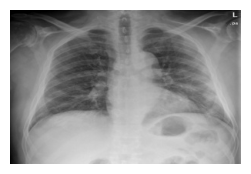

In [4]:
view_random_image(target_dir=Chest_train,target_class='COVID-19')

## 3 Lets visualize the distribution of the training data 🔍

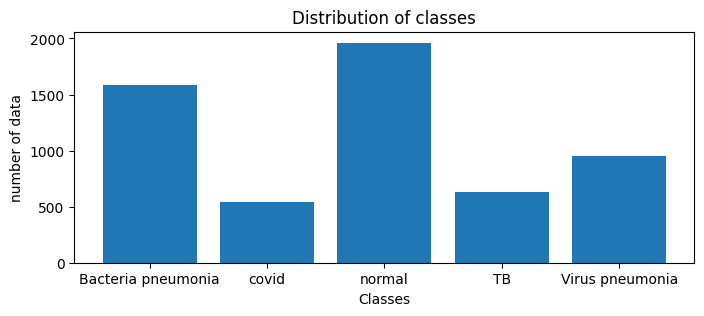

In [5]:

# getting length of the sub classes
BAC_n=len(os.listdir('/content/drive/MyDrive/Chest/Bacteria pneumonia'))
COVID=len(os.listdir('/content/drive/MyDrive/Chest/COVID-19'))
Normal=len(os.listdir('/content/drive/MyDrive/Chest/NORMAL'))
TB=len(os.listdir('/content/drive/MyDrive/Chest/Tuberculosis'))
virus_n=len(os.listdir('/content/drive/MyDrive/Chest/Virus pneumonia'))

classes=['Bacteria pneumonia', "covid",'normal','TB','Virus pneumonia']
values=[BAC_n,COVID,Normal,TB,virus_n]

fig = plt.figure(figsize=(8, 3))  # Set the width and height of the figure

plt.bar(classes,values)
 
# Adding title to the plot
plt.title("Distribution of classes")
 
# Adding label on the y-axis
plt.ylabel('number of data')
 
# Adding label on the x-axis
plt.xlabel('Classes')

plt.show()

## 4.Pre-processing ⚙

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# recaling pixels 
train_data_gen = ImageDataGenerator(rescale=1./255,
                                   )

# dividing into batches and  
train_generator = train_data_gen.flow_from_directory(
    Chest_train,
    target_size=(224,224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical', # we are working with multiclass problem
    shuffle=True
)


# recaling pixels 
test_data_gen = ImageDataGenerator(rescale=1./255
                                                              )

# dividing into batches and  
test_generator = train_data_gen.flow_from_directory(
    Chest_test,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical',# we are working with multiclass problem
    shuffle=True
)

Found 5669 images belonging to 5 classes.
Found 1395 images belonging to 5 classes.


In [7]:
import os

# Specify the path to the directory you want to list subdirectories for
directory_path = '/content/drive/MyDrive/Chest-Test'

# Use the os.listdir() function to get a list of all items (files and directories) in the specified directory
items = os.listdir(directory_path)

# Iterate over the items and check if they are directories
subdirectories = []
for item in items:
    item_path = os.path.join(directory_path, item)
    if os.path.isdir(item_path):
        subdirectories.append(item)

# Print the list of subdirectories
print(subdirectories)


['Tuberculosis', 'COVID-19', 'NORMAL', 'Bacteria pneumonia', 'Virus pneumonia']


> we got 5669 images divided into 5 sub-classes for training 

> 1395 images divided into 5 sub-classes for testing

> total image [training+test]= 7064

run below cell if u wanna see numeric representation

In [8]:
# train_generator[0]

## **5. Lets step into modeling 🕺**

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential


tf.random.set_seed(42) #why 42? because it is Answer to the Ultimate Question of Life, the Universe, and Everything if you know you know 

Model_1=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # softmax as we are working with multiclass problem
])


In [10]:
Model_1.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.RMSprop(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 


In [11]:
history=Model_1.fit(train_generator, 
                   epochs=5,
                    steps_per_epoch=len(train_generator ), 
                   validation_data=(test_generator),
                   validation_steps=len(test_generator ))

Epoch 1/5
178/178 [==============================] - 1515s 8s/step - loss: 1.0549 - accuracy: 0.6250 - val_loss: 0.7210 - val_accuracy: 0.7147
Epoch 2/5
178/178 [==============================] - 25s 143ms/step - loss: 0.6099 - accuracy: 0.7680 - val_loss: 0.5187 - val_accuracy: 0.7964
Epoch 3/5
178/178 [==============================] - 25s 140ms/step - loss: 0.4976 - accuracy: 0.8113 - val_loss: 0.3921 - val_accuracy: 0.8452
Epoch 4/5
178/178 [==============================] - 25s 142ms/step - loss: 0.4291 - accuracy: 0.8460 - val_loss: 0.4206 - val_accuracy: 0.8308
Epoch 5/5
178/178 [==============================] - 26s 148ms/step - loss: 0.3278 - accuracy: 0.8767 - val_loss: 0.3868 - val_accuracy: 0.8466


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential

from tensorflow.keras.applications import VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG-19 as a feature extractor
model = Sequential()
model.add(base_model)

# Add custom top layers for the new task
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))  # num_classes is the number of classes in your new task
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=len(train_generator),
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/5
178/178 [==============================] - 40s 215ms/step - loss: 0.8158 - accuracy: 0.7375 - val_loss: 0.3784 - val_accuracy: 0.8466
Epoch 2/5
178/178 [==============================] - 37s 206ms/step - loss: 0.3823 - accuracy: 0.8472 - val_loss: 0.3829 - val_accuracy: 0.8330
Epoch 3/5
178/178 [==============================] - 40s 224ms/step - loss: 0.3359 - accuracy: 0.8631 - val_loss: 0.3392 - val_accuracy: 0.8573
Epoch 4/5
178/178 [==============================] - 37s 210ms/step - loss: 0.3209 - accuracy: 0.8732 - val_loss: 0.5370 - val_accuracy: 0.7785
Epoch 5/5
178/178 [==============================] - 37s 207ms/step - loss: 0.2849 - accuracy: 0.8838 - val_loss: 0.5270 - val_accuracy: 0.7943


## 6.helperfunction for plotting loss curves 📉

In [19]:
import pandas as pd
def plot_loss_curves(hist):
    pd.DataFrame(hist.history).plot(figsize=(5,5))

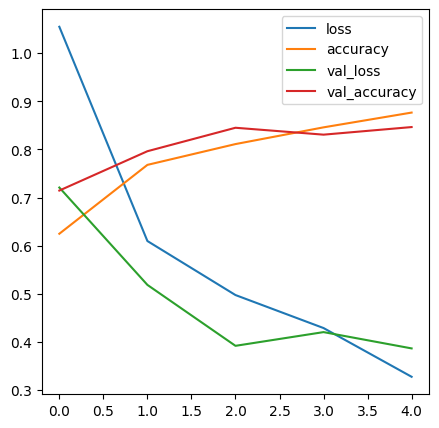

In [20]:
plot_loss_curves(history)

## 7.Adam V/S RMSprop 🤜

In [21]:
tf.random.set_seed(42)

Model_2=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # softmax as we are working with multiclass problem
])
Model_2.compile(loss='categorical_crossentropy' ,# as we got multiple classes
                            optimizer=tf.keras.optimizers.Adam(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 

history_2=Model_2.fit(train_generator, 
                   epochs=5,
                    steps_per_epoch=len(train_generator ), 
                   validation_data=(test_generator),
                   validation_steps=len(test_generator ))

Epoch 1/5
178/178 [==============================] - 31s 162ms/step - loss: 0.8719 - accuracy: 0.6499 - val_loss: 0.6105 - val_accuracy: 0.7369
Epoch 2/5
178/178 [==============================] - 25s 143ms/step - loss: 0.5742 - accuracy: 0.7753 - val_loss: 0.5020 - val_accuracy: 0.7864
Epoch 3/5
178/178 [==============================] - 25s 140ms/step - loss: 0.4927 - accuracy: 0.8070 - val_loss: 0.4875 - val_accuracy: 0.8000
Epoch 4/5
178/178 [==============================] - 26s 147ms/step - loss: 0.4536 - accuracy: 0.8307 - val_loss: 0.4937 - val_accuracy: 0.7943
Epoch 5/5
178/178 [==============================] - 24s 137ms/step - loss: 0.4041 - accuracy: 0.8441 - val_loss: 0.3916 - val_accuracy: 0.8294


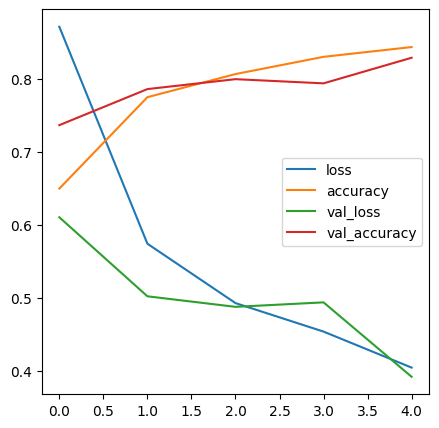

In [22]:
plot_loss_curves(history_2)

#2.0  Brain MRI Classification 🧠

In [23]:
Brain_train='/content/drive/MyDrive/Brain_multiclass/Training/'
Brain_test='/content/drive/MyDrive/Brain_multiclass/Testing/'

## 2.1 visualizing  our data **🔍**

img shape:(512, 512)


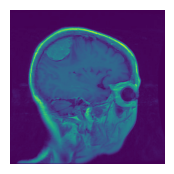

In [24]:
view_random_image(target_dir=Brain_train,target_class='meningioma')

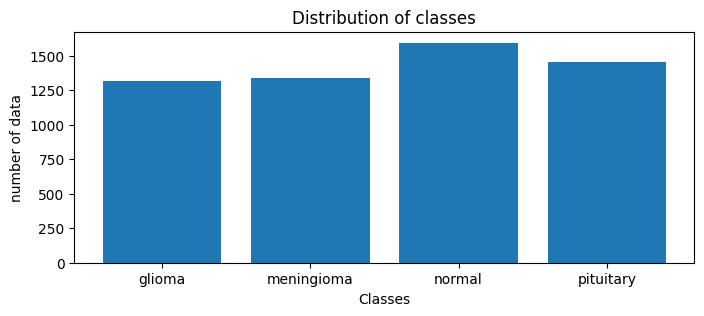

In [25]:

# getting length of the sub classes
gol=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/glioma'))
men=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/meningioma'))
Normal=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/notumor'))
pit=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/pituitary'))

classes=['glioma', "meningioma",'normal','pituitary']
values=[gol,men,Normal,pit]

fig = plt.figure(figsize=(8, 3))  # Set the width and height of the figure

plt.bar(classes,values)
 
# Adding title to the plot
plt.title("Distribution of classes")
 
# Adding label on the y-axis
plt.ylabel('number of data')
 
# Adding label on the x-axis
plt.xlabel('Classes')

plt.show()

## 2.2 Pre-processing ⚙

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# recaling pixels 
train_data_gen = ImageDataGenerator(rescale=1./255)

# dividing into batches and  
train_generator_brain = train_data_gen.flow_from_directory(
    Brain_train,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical' # we are working with multiclass problem
)


# recaling pixels 
test_data_gen_brain = ImageDataGenerator(rescale=1./255)

# dividing into batches and  
test_generator_brain = train_data_gen.flow_from_directory(
    Brain_test,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical' # we are working with multiclass problem
)

Found 5712 images belonging to 4 classes.
Found 1316 images belonging to 4 classes.


In [ ]:
# train_generator[0] 


## 2.3 Model Building 🕺

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential
tf.random.set_seed(42)

Model_2=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # softmax as we are working with multiclass problem
])
Model_2.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.Adam(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 

history_2=Model_2.fit(train_generator_brain, 
                   epochs=5,
                    steps_per_epoch=len(# dividing into batches and  
                  train_generator_brain  ), 
                   validation_data=(test_generator_brain),
                   validation_steps=len(test_generator_brain ))

Epoch 1/5
179/179 [==============================] - 1315s 7s/step - loss: 0.7453 - accuracy: 0.6996 - val_loss: 0.5841 - val_accuracy: 0.7918
Epoch 2/5
179/179 [==============================] - 38s 211ms/step - loss: 0.3707 - accuracy: 0.8640 - val_loss: 0.3699 - val_accuracy: 0.8708
Epoch 3/5
179/179 [==============================] - 32s 180ms/step - loss: 0.2187 - accuracy: 0.9196 - val_loss: 0.2745 - val_accuracy: 0.8982
Epoch 4/5
179/179 [==============================] - 38s 212ms/step - loss: 0.1422 - accuracy: 0.9517 - val_loss: 0.3044 - val_accuracy: 0.8929
Epoch 5/5
179/179 [==============================] - 38s 215ms/step - loss: 0.0755 - accuracy: 0.9769 - val_loss: 0.2716 - val_accuracy: 0.9202


## 2.4 Plottin Loss 📉

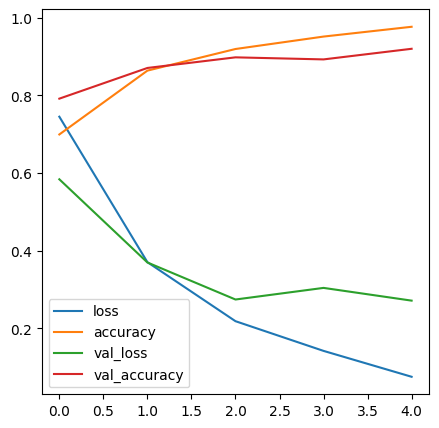

In [28]:
plot_loss_curves(history_2)

## 2.5 RMSprop

In [29]:
model_3=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # softmax as we are working with multiclass problem
])
# we clone the above model  architecture 
model_3.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.RMSprop(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 

history_3=Model_2.fit(train_generator_brain, 
                   epochs=5,
                    steps_per_epoch=len(# dividing into batches and  
                  train_generator_brain  ), 
                   validation_data=(test_generator_brain),
                   validation_steps=len(test_generator_brain ))

Epoch 1/5
179/179 [==============================] - 32s 181ms/step - loss: 0.0494 - accuracy: 0.9862 - val_loss: 0.2532 - val_accuracy: 0.9233
Epoch 2/5
179/179 [==============================] - 33s 185ms/step - loss: 0.0314 - accuracy: 0.9923 - val_loss: 0.2034 - val_accuracy: 0.9392
Epoch 3/5
179/179 [==============================] - 32s 181ms/step - loss: 0.0160 - accuracy: 0.9968 - val_loss: 0.2307 - val_accuracy: 0.9362
Epoch 4/5
179/179 [==============================] - 33s 186ms/step - loss: 0.0340 - accuracy: 0.9904 - val_loss: 0.2410 - val_accuracy: 0.9377
Epoch 5/5
179/179 [==============================] - 33s 185ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.2599 - val_accuracy: 0.9301
